In [1]:
MOOD_DIR = ''
GENRE_DIR = ''

In [90]:
import commons
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

import seaborn as sns

In [91]:
def get_class_counts(DIR):
    classes = list(os.listdir(DIR))
    result = pd.DataFrame(columns=['class', 'count'])
    for c in classes:
        count = len(os.listdir(os.path.join(DIR, c)))
        new_row = pd.Series({'class': c, 'count': int(count)}).to_frame().T
        result = pd.concat([result, new_row])
        result.reset_index(drop=True, inplace=True)
    print(result['count'].sum())
    return result.sort_values(by=['count'], ascending=False)

In [92]:
def plot_class_barplot(data, xlabel, ylabel):
    plt.figure(figsize=(20, 20))
    ax = sns.barplot(data=data, x='count', y='class')
    ax.set(xlabel=xlabel, ylabel=ylabel)

18486


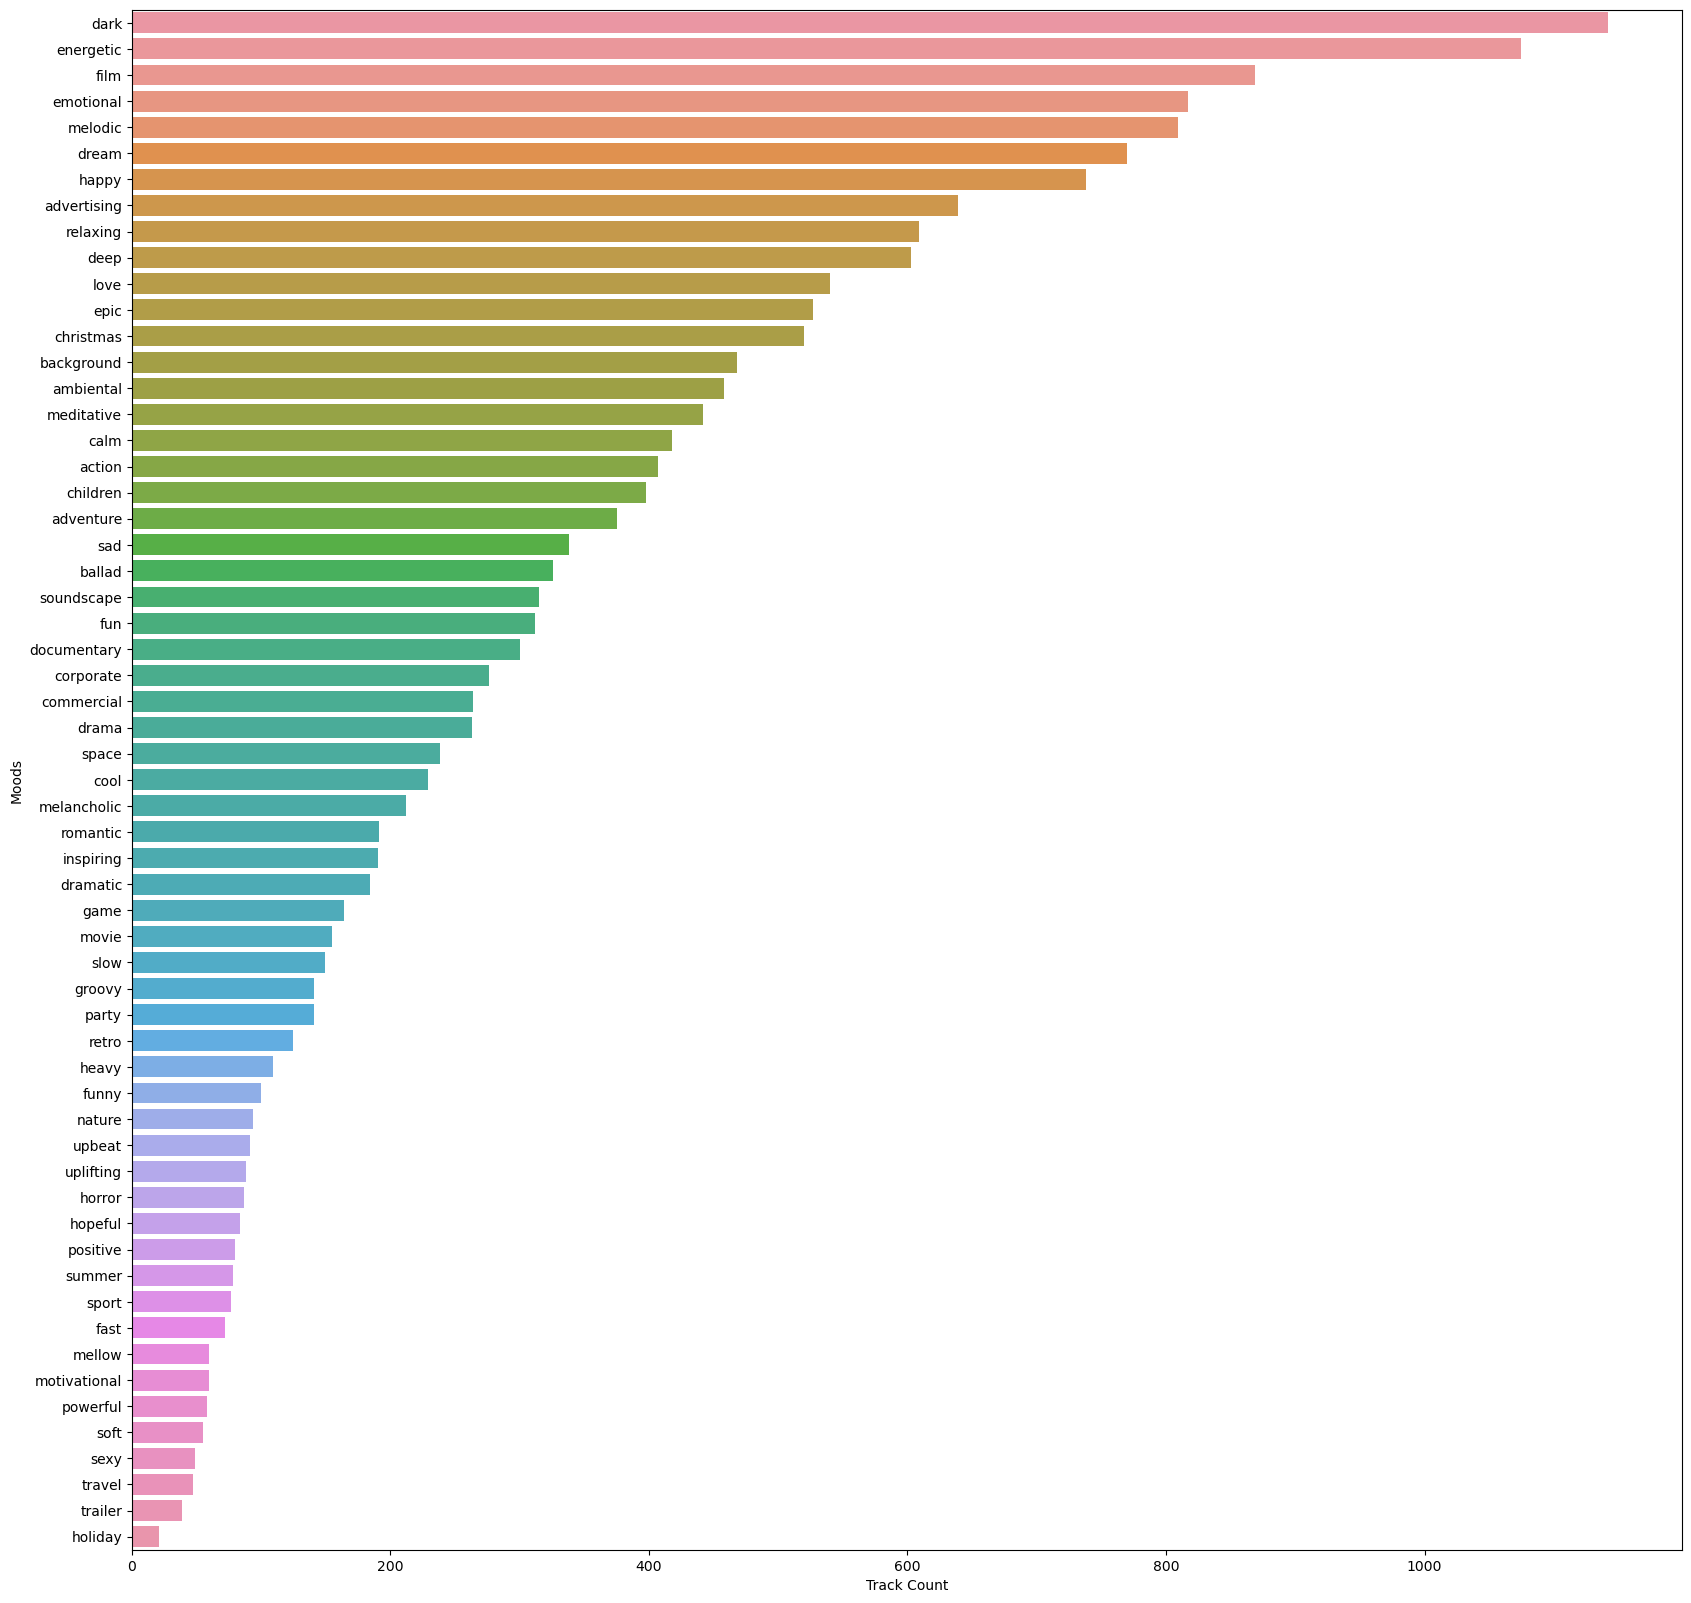

In [93]:
mood = get_class_counts(MOOD_DIR)
plot_class_barplot(mood, 'Track Count', 'Moods')

55215


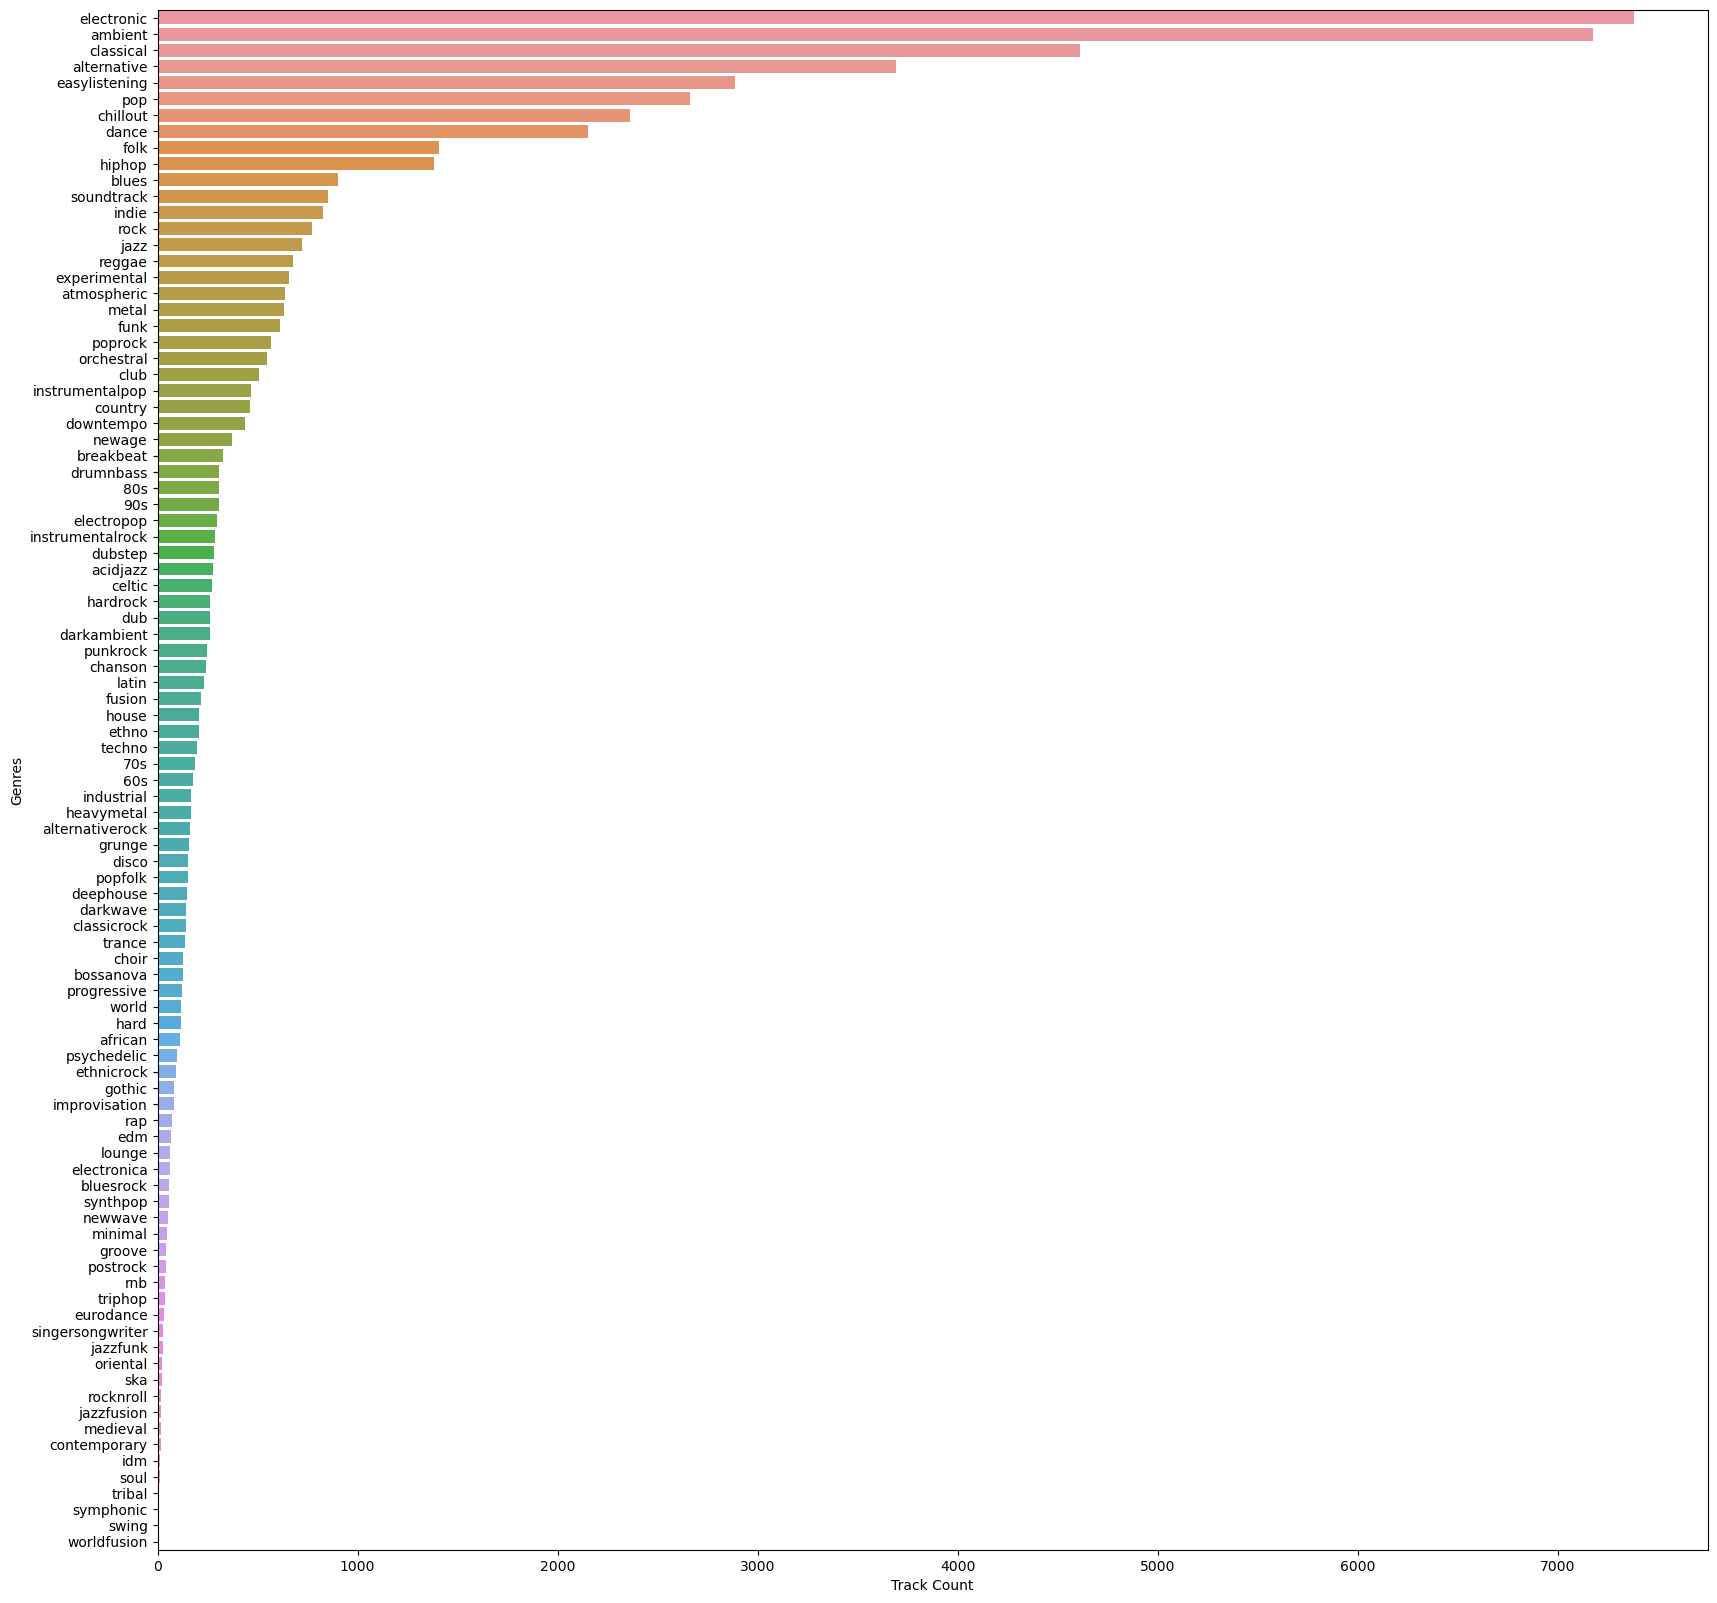

In [94]:
genre = get_class_counts(GENRE_DIR)
plot_class_barplot(genre, 'Track Count', 'Genres')

In [95]:
mood

,class,count
48,dark,1142
33,energetic,1075
8,film,869
44,emotional,817
2,melodic,809
55,dream,770
7,happy,738
47,advertising,639
17,relaxing,609
28,deep,603


In [96]:
genre

,class,count
47,electronic,7379
36,ambient,7174
50,classical,4611
5,alternative,3692
76,easylistening,2889
...,...,...
77,soul,10
68,tribal,6
53,symphonic,4
32,swing,2


In [123]:
def check_overlap(DIR):
    files = {
        'train': set(),
        'test': set(),
        'valid': set(),
    }
    for split in files.keys():
        print(split)
        classes = list(os.listdir(os.path.join(DIR, split)))
        for c in classes:
            tracks = list(os.listdir(os.path.join(DIR, split, c)))
            files[split].update(tracks)
    inter1 = set.intersection(files['test'], files['train'])
    inter2 = set.intersection(files['test'], files['valid'])
    inter3 = set.intersection(files['train'], files['valid'])
    print('common elements ', inter1, inter2, inter3)
    return files       

In [124]:
res = check_overlap(MOOD_DIR)
len(res['test'])

train
test
valid
common elements  set() set() set()


4231